<a href="https://colab.research.google.com/github/PaulaFlavia/Confusion-Matrix-and-metrics/blob/main/Confusion_Matrix_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [4]:
# Carregar o conjunto de dados de cães e gatos do TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
# Definir as classes positiva e negativa
positive_class = 0 # Cães
negative_class = 1 # Gatos

In [6]:
# Criar o modelo
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Obter as previsões do modelo
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)


313/313 [==============================] - 3s 9ms/step


In [8]:
# Definir as variáveis VP, VN, FP e FN
VP = ((test_labels == positive_class) & (predictions == positive_class)).sum()
VN = ((test_labels == negative_class) & (predictions == negative_class)).sum()
FP = ((test_labels == negative_class) & (predictions == positive_class)).sum()
FN = ((test_labels == positive_class) & (predictions == negative_class)).sum()


In [9]:
# Calcular a acurácia
accuracy = (VP + VN) / (VP + VN + FP + FN)


# Calcular a sensibilidade
sensitivity = VP / (VP + FN)

# Calcular a precisão
precision = VP / (VP + FP)

# Calcular o f1 score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)


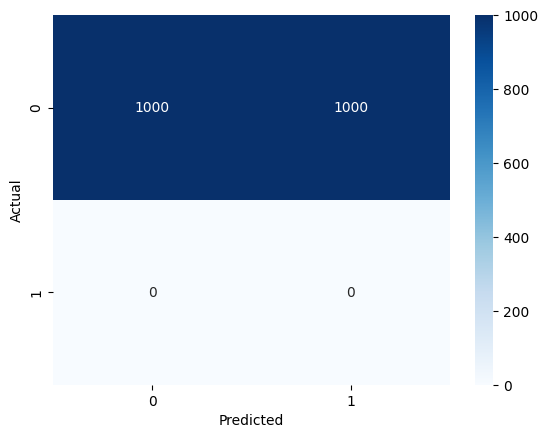

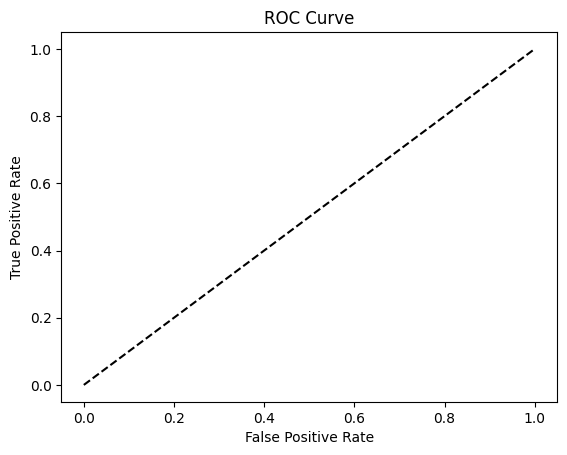

In [10]:
# Plotar a matriz de confusão
confusion_matrix = np.array([[VP, FP], [FN, VN]])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calcular as taxas de falsos positivos e verdadeiros positivos
fpr = FP / (FP + VN)
tpr = VP / (VP + FN)

# Plotar a curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [11]:
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Precision:", precision)
print("F1 Score:", f1_score)


Accuracy: 0.5
Sensitivity: 1.0
Precision: 0.5
F1 Score: 0.6666666666666666
